# Singfake Dataset

*In this notebook, the logistic regression model was used for the detection of AI generated videos through investigating the relationship between the amount of views,likes and comments on the respective videos. The video data for this notebook was collected through the use of BiliBili's and Youtube's APIs.for this notebook 0 denotes real videos and 1 denotes fake videos.*

### Logistic Regression Implementation

In [1]:
import pandas as pd

col_names = ['set','bonafide_or_spoof','language','singer','title','url','views','likes','comments']

pdata = pd.read_csv('singfake_eda.csv', skiprows=1, names=col_names)

pdata.head(10)

,set,bonafide_or_spoof,language,singer,title,url,views,likes,comments
0,Training,0,Mandarin,Stefanie_Sun,尚好的青春-孙燕姿,https://www.bilibili.com/video/BV1J841177n3?p=19,3335891,28129,1038
1,Training,0,Mandarin,Hebe_Tien,【首播】田馥甄 - 灵魂伴侣 - 官方MV,https://www.bilibili.com/video/BV18s411k7K3/?s...,152316,1329,173
2,T01,0,Mandarin,Stefanie_Sun,【私藏馆】孙燕姿《遇见》爆火神曲！祝大家节日快乐！,https://www.bilibili.com/video/BV1Q44y1M7bB/?s...,7920420,132851,3827
3,Training,0,Mandarin,Mayday,Mayday五月天【星空】MV官方完整版-電影「星空」主題曲,https://www.youtube.com/watch?v=RTUwaCImChM,44845261,112283,4765
4,Training,0,Mandarin,Stefanie_Sun,害怕-孙燕姿,https://www.bilibili.com/video/BV1J841177n3?p=...,3335894,28129,1038
5,T02,0,Mandarin,Teresa_Teng,邓丽君演唱《红豆》歌声悠扬，经典动听，让人回味无穷,https://www.bilibili.com/video/BV1LV4y1P7yJ/?s...,6106,28,10
6,Training,0,Mandarin,Hebe_Tien,【田馥甄】终身大事-2014 Live「2GETHER 4EVER ENCORE影音館」,https://www.bilibili.com/video/BV1os411B7NN/?s...,50649,590,67
7,Training,0,Mandarin,Hebe_Tien,田馥甄 - 要死就一定要死在你手里【梦想的声音】,https://www.bilibili.com/video/BV1Wx411n74G/?s...,166100,919,107
8,Training,0,Mandarin,Jay_Chou,周杰倫 Jay Chou【浪漫手機 Romantic Cellphone】-Official...,https://www.youtube.com/watch?v=Kbvu9Vt5_eE&li...,7256658,27676,2060
9,Training,0,Mandarin,Hebe_Tien,还是要幸福,https://www.bilibili.com/video/BV1ja4y147Wr?p=11,12402,92,4


In [2]:
print(pdata.dtypes)

set                  object
bonafide_or_spoof     int64
language             object
singer               object
title                object
url                  object
views                 int64
likes                 int64
comments              int64
dtype: object


In [3]:
import sklearn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

feat_col = ['views','likes','comments']

X = pdata[feat_col] 
y = pdata.bonafide_or_spoof



In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
print(len(X_train))
print(len(y_train))

1009
1009


In [6]:
print(y_train)

32      0
156     0
382     0
1062    1
365     0
       ..
1044    1
1095    1
1130    1
860     1
1126    1
Name: bonafide_or_spoof, Length: 1009, dtype: int64


In [7]:
print(X_train)

       views  likes  comments
32     56464    579        28
156    11587    520        33
382    12356    251        30
1062    8635     62         9
365    79299   1223        36
...      ...    ...       ...
1044  305439   6750       472
1095     639      9         7
1130   16142    184        47
860     6384     86        22
1126   22814    576       109

[1009 rows x 3 columns]


In [31]:
lrmodel = LogisticRegression(max_iter=200,random_state=42)

lrmodel.fit(X_train, y_train)

y_pred = lrmodel.predict(X_test)
y_pred 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0])

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7193675889328063
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.49      0.66       138
           1       0.62      0.99      0.76       115

    accuracy                           0.72       253
   macro avg       0.80      0.74      0.71       253
weighted avg       0.82      0.72      0.70       253



In [29]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix 

array([[ 68,  70],
       [  1, 114]])

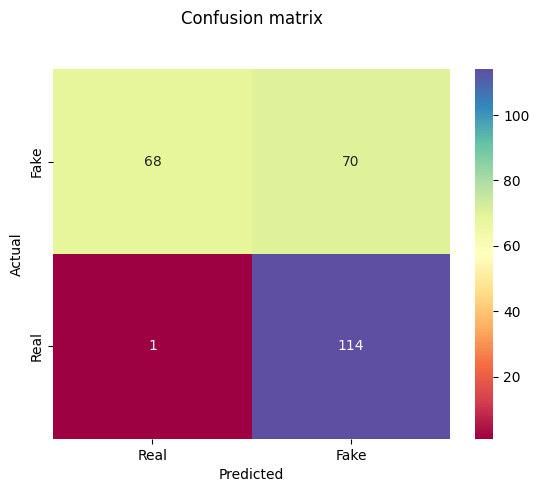

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Renders the heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap=sns.color_palette("Spectral", as_cmap=True) ,fmt='g',xticklabels=['Real', 'Fake'], yticklabels=['Fake', 'Real'])
plt.title('Confusion matrix', y=1.1) #Sets the title, location and distance
plt.ylabel('Actual') #Labels the Y axis as Actual
plt.xlabel('Predicted') #Labels the X axis as Predicted
plt.show()

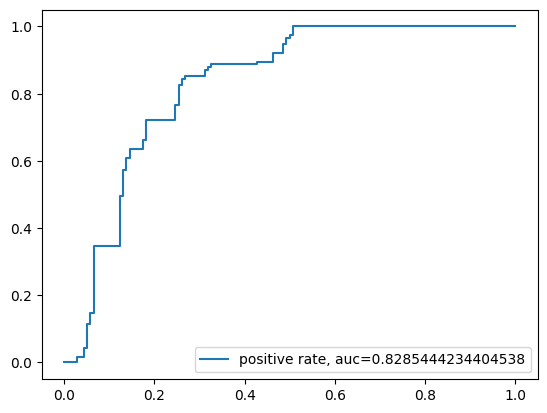

In [12]:
y_pred_proba = lrmodel.predict_proba(X_test)[::,1] #Calculates the probability of positive class 1
falseposrate, trueposrate, _ = metrics.roc_curve(y_test,  y_pred_proba) #Gets the false positive rate and true positive rate
auc = metrics.roc_auc_score(y_test, y_pred_proba) #Calculates AUC scaore
plt.plot(falseposrate,trueposrate,label="positive rate, auc="+str(auc)) #Plots the false postive rate and true positive rate
plt.legend(loc=4) #Sets location of the legend
plt.show()

### Conclusion Logistic Regression

*The Logistic Regression model yield an accuracy of 0.719 with and f1-score of 0.66 for real videos and 0.76 for fake videos and an ACU value of 0.827. This shows that this model can dectect the AI generated videos relatively well.*

## K-Nearest Neighbor

In [27]:
from sklearn.neighbors import KNeighborsClassifier


knnmodel = KNeighborsClassifier(n_neighbors=10) 

knnmodel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [14]:
print(len(X_train))
print(len(y_train))

1009
1009


In [15]:
y_pred_knn = knnmodel.predict(X_test)
y_pred_knn

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [16]:
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.8537549407114624
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       138
           1       0.84      0.83      0.84       115

    accuracy                           0.85       253
   macro avg       0.85      0.85      0.85       253
weighted avg       0.85      0.85      0.85       253



In [17]:
cnf_knn = metrics.confusion_matrix(y_test, y_pred_knn)
cnf_knn

array([[120,  18],
       [ 19,  96]])

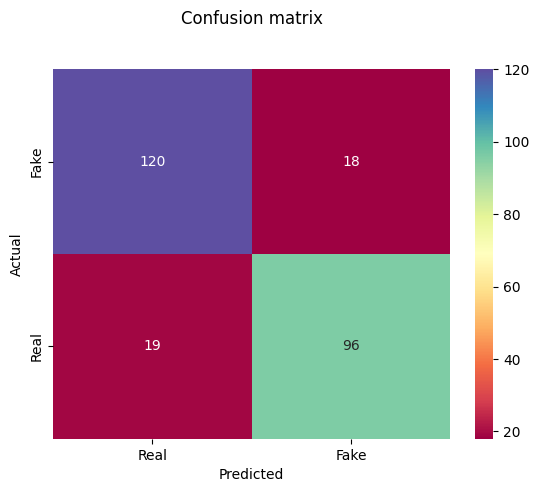

In [18]:
#Renders the Heatmap
sns.heatmap(cnf_knn, annot=True, fmt='d', cmap=sns.color_palette("Spectral", as_cmap=True),xticklabels=['Real', 'Fake'], yticklabels=['Fake', 'Real'])
plt.title('Confusion matrix', y=1.1) #Sets the title, location and distance
plt.xlabel('Predicted') #Labels the X axis as Actual
plt.ylabel('Actual') #Labels the Y axis as Predicted
plt.show()

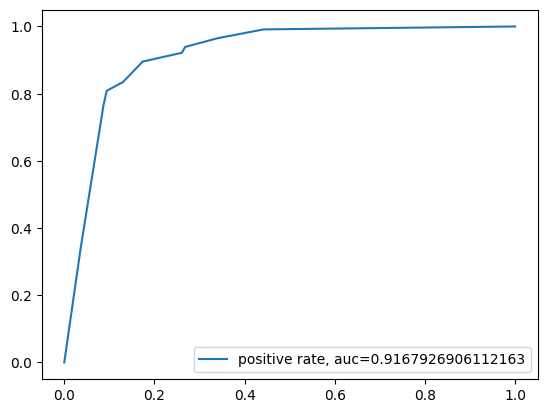

In [19]:
y_pred_proba_knn = knnmodel.predict_proba(X_test)[::,1] #Calculates the probability of positive class 1
falseposrateknn, trueposrateknn, _ = metrics.roc_curve(y_test,  y_pred_proba_knn) #Gets the false positive rate and true positive rate
auc = metrics.roc_auc_score(y_test, y_pred_proba_knn) #Calculates AUC score
plt.plot(falseposrateknn,trueposrateknn,label="positive rate, auc="+str(auc)) #Plots the false postive rate and true positive rate
plt.legend(loc=4) #Sets location of the legend
plt.show()

### Conclusion for K-Nearest Neighbor

*The K-Nearest Neighbor model yield an accuracy of 0.854 with and f1-score of 0.87 for real videos and 0.84 for fake videos and an ACU value of 0.917. This shows that this model can dectect the AI generated videos better than the Logisitic Regression model and the Decision Tree model.*

# Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

In [21]:
dtc = dtc.fit(X_train,y_train)

In [22]:
y_pred_dtc = dtc.predict(X_test)
y_pred_dtc

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [23]:
accuracy = accuracy_score(y_test, y_pred_dtc)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred_dtc))

Accuracy: 0.8458498023715415
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       138
           1       0.83      0.83      0.83       115

    accuracy                           0.85       253
   macro avg       0.84      0.84      0.84       253
weighted avg       0.85      0.85      0.85       253



In [24]:
cnf_dtc = metrics.confusion_matrix(y_test, y_pred_dtc)
cnf_dtc

array([[118,  20],
       [ 19,  96]])

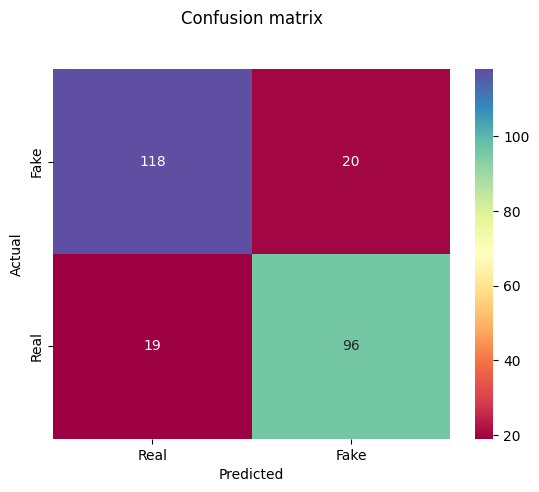

In [25]:
sns.heatmap(cnf_dtc, annot=True, fmt='d', cmap=sns.color_palette("Spectral", as_cmap=True),xticklabels=['Real', 'Fake'], yticklabels=['Fake', 'Real'])
plt.title('Confusion matrix', y=1.1) #Sets the title, location and distance
plt.xlabel('Predicted') #Labels the X axis as Actual
plt.ylabel('Actual') #Labels the Y axis as Predicted
plt.show()

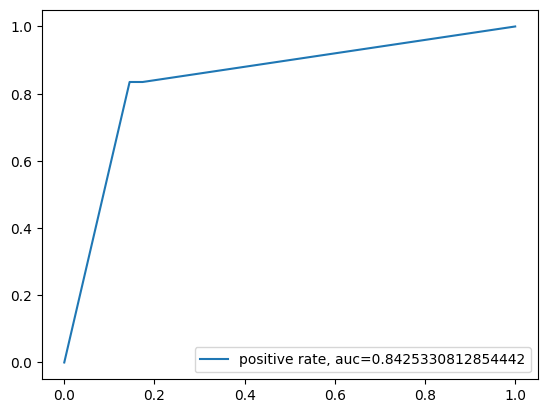

In [26]:
y_pred_proba_dtc = dtc.predict_proba(X_test)[::,1] #Calculates the probability of positive class 1
falseposratedtc, trueposratedtc, _ = metrics.roc_curve(y_test,  y_pred_proba_dtc) #Gets the false positive rate and true positive rate
auc = metrics.roc_auc_score(y_test, y_pred_proba_dtc) #Calculates AUC score
plt.plot(falseposratedtc,trueposratedtc,label="positive rate, auc="+str(auc)) #Plots the false postive rate and true positive rate
plt.legend(loc=4) #Sets location of the legend
plt.show()

### Conclusion for Decision Tree

*The Decision Tree model yield an accuracy of 0.846 with and f1-score of 0.86 for real videos and 0.83 for fake videos and an ACU value of 0.843. This shows that this model can dectect the AI generated videos better than the Logistic Regression model but not as well as the K-Nearest Neighbor model.*

# Baseline

*The baseline derived from this notebook is as follows:*
- Accuracy = 0.806
- F1-Score (0) = 0.80 (0.796)
- F1-Score (1) = 0.81
- AUC Score = 0.862